In [1]:
import matplotlib.pyplot as plt
import pandas as pd

import utils as u
from visualization import nearby


In [2]:
filename = u.get_filename("H14")
basename = u.get_basename(filename)
combined_df = u.get_combinedf(basename)

In [3]:
vx_topic = "/imu_and_wheel_odom/lin_twi/x"
wz_topic = "/MTI_imu/data/ang_vel/z"
rd_topic = "/status/current/drive_right"
# vx_topic = "/imu_and_wheel_odom/ang_twi/z"
# vx_topic = "/warthog_velocity_controller/cmd_vel/linear/x"
# wz_topic = "/warthog_velocity_controller/cmd_vel/angular/z"

In [4]:
combined_df.head()
# cols = [col for col in combined_df.columns.values if col.startswith("/imu_and_wheel")]
# df = combined_df[cols].copy()
# clip = lambda s: s[20:]
# df.rename(clip, axis="columns", inplace=True)
# df.head()

time  /joint_states/time  /joint_states/velocity/left  \
0  1.681485e+09        1.681485e+09                     1.817081   
1  1.681485e+09        1.681485e+09                     1.817081   
2  1.681485e+09        1.681485e+09                     1.817081   
3  1.681485e+09        1.681485e+09                     1.817081   
4  1.681485e+09        1.681485e+09                     1.817081   

   /joint_states/velocity/right  /joint_states/position/left  \
0                      1.817081                   761.871593   
1                      1.817081                   762.029073   
2                      1.817081                   762.416717   
3                      1.817081                   762.501514   
4                      1.817081                   762.822532   

   /joint_states/position/right    time_floor     elec_time  /status/time  \
0                   1153.688674  1.681485e+10  1.681485e+09           0.0   
1                   1153.930951  1.681485e+10  1.681485e+09           0.0   
2                   1154.233798  1.681485e+10  1.681485e+09           0.0   
3                   1154.403392  1.681485e+10  1.681485e+09           0.0   
4                   1154.639612  1.681485e+10  1.681485e+09           0.0   

   /status/voltage/drive_left  ...  \
0                       24.64  ...   
1                       24.75  ...   
2                       24.67  ...   
3                       24.46  ...   
4                       24.75  ...   

   /husky_velocity_controller/cmd_vel_unstamped/linear/z  \
0                                                0.0       
1                                                0.0       
2                                                0.0       
3                                                0.0       
4                                                0.0       

   /husky_velocity_controller/cmd_vel_unstamped/angular/x  \
0                                                0.0        
1                                                0.0        
2                                                0.0        
3                                                0.0        
4                                                0.0        

   /husky_velocity_controller/cmd_vel_unstamped/angular/y  \
0                                                0.0        
1                                                0.0        
2                                                0.0        
3                                                0.0        
4                                                0.0        

   /husky_velocity_controller/cmd_vel_unstamped/angular/z  current  voltage  \
0                                                0.0          0.00    24.64   
1                                                0.0          0.00    24.75   
2                                                0.0          4.27    24.67   
3                                                0.0          7.42    24.46   
4                                                0.0          0.00    24.75   

      power  time_rel  energy_ws  energy_wh  
0    0.0000  0.000000   0.000000   0.000000  
1    0.0000  0.159262   0.000000   0.000000  
2  105.3409  0.271668   5.920501   0.001645  
3  181.4932  0.383130  21.905932   0.006085  
4    0.0000  0.543438  36.453349   0.010126  

[5 rows x 75 columns]

In [5]:
combined_df.columns.values

array(['time', '/joint_states/time', '/joint_states/velocity/left',
       '/joint_states/velocity/right', '/joint_states/position/left',
       '/joint_states/position/right', 'time_floor', 'elec_time',
       '/status/time', '/status/voltage/drive_left',
       '/status/voltage/drive_right', '/status/voltage/battery',
       '/status/current/cpu', '/status/current/drive_left',
       '/status/current/drive_right', '/status/temperature/motor_left',
       '/status/temperature/motor_right',
       '/status/temperature/drive_left',
       '/status/temperature/drive_right', '/status/battery/level',
       '/status/battery/total', '/status/cpu/current', 'imu_data_time',
       '/MTI_imu/data/time', '/MTI_imu/data/orientation/x',
       '/MTI_imu/data/orientation/y', '/MTI_imu/data/orientation/z',
       '/MTI_imu/data/orientation/w', '/MTI_imu/data/orientation/roll',
       '/MTI_imu/data/orientation/pitch', '/MTI_imu/data/orientation/yaw',
       '/MTI_imu/data/ang_vel/x', '/MTI_imu/data

In [6]:
[col for col in combined_df.columns.values if "cmd" in col]
# combined_df["/cmd_vel/linear/x"].plot()

['cmd_vel_time',
 '/husky_velocity_controller/cmd_vel_unstamped/linear/x',
 '/husky_velocity_controller/cmd_vel_unstamped/linear/y',
 '/husky_velocity_controller/cmd_vel_unstamped/linear/z',
 '/husky_velocity_controller/cmd_vel_unstamped/angular/x',
 '/husky_velocity_controller/cmd_vel_unstamped/angular/y',
 '/husky_velocity_controller/cmd_vel_unstamped/angular/z']

<AxesSubplot: >

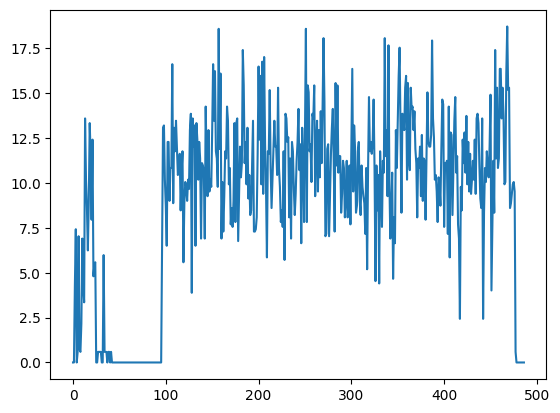

In [7]:
combined_df["current"].plot()

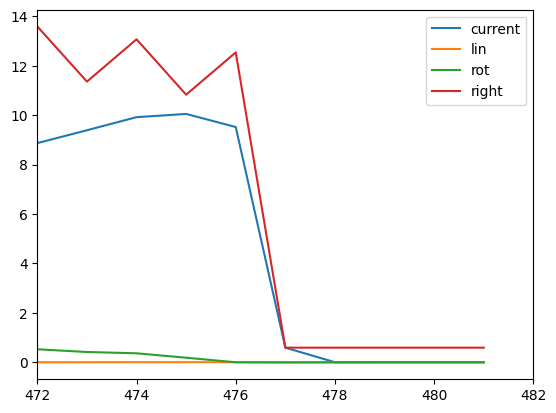

In [14]:
st = 95
en = 477
# nearby(combined_df, st, span=5)
# nearby(combined_df, st, span=5, topic=vx_topic, label="lin")
# nearby(combined_df, st, span=5, topic=wz_topic, label="rot")
nearby(combined_df, en, span=5)
nearby(combined_df, en, span=5, topic=vx_topic, label="lin")
nearby(combined_df, en, span=5, topic=wz_topic, label="rot")
nearby(combined_df, en, span=5, topic=rd_topic, label="right")
# nearby(combined_df, st, span=25, topic=wz_topic)
# nearby(combined_df, en, span=5, topic=wz_topic)
# nearby(combined_df, en, span=5, topic="/warthog_velocity_controller/cmd_vel/linear/x")
plt.gca().legend()

In [ ]:
nearby(combined_df, 25, span=25)

In [ ]:
fig, ax = plt.subplots()
# combined_df.current.plot(ax=ax, label="current")
combined_df[vx_topic].plot(ax=ax, label="lin")
combined_df[wz_topic].plot(ax=ax, label="rot")
ax.legend()

In [ ]:
combined_df[vx_topic].plot()

In [ ]:
fig, ax = plt.subplots()
li = st
# li = en
nearby(combined_df, li, topic=vx_topic, span=5, ax=ax, label="lin")
nearby(combined_df, li, topic=wz_topic, span=5, ax=ax, label="rot")
ax.legend()
# nearby(combined_df, en, topic=vx_topic, span=5)
# nearby(combined_df, st, topic="front_altitude", span=50)
# nearby(combined_df, en, topic="front_altitude", span=50)

In [ ]:
fig, subfigs = plt.subplots(nrows=3, sharex=True)
for letter, ax in zip("xyz",subfigs.reshape(-1)):
    combined_df[f"/imu_and_wheel_odom/position/{letter}"].plot(ax=ax)
    ax.set_ylabel(letter)

In [ ]:
# combined_df["/cmd_vel/linear/x"].plot()
combined_df["/imu_and_wheel_odom/lin_twi/x"].plot()

In [ ]:
# combined_df["back_latitude"].iloc[:st].plot()
combined_df["back_latitude"].iloc[st:en].plot()
# combined_df["back_latitude"].iloc[en:].plot()

In [ ]:
# combined_df["back_longitude"].iloc[:st].plot()
combined_df["back_longitude"].iloc[st:en].plot()

In [ ]:
# combined_df["back_altitude"].iloc[:st].plot()
combined_df["back_altitude"].iloc[st:en].plot()

In [ ]:
# combined_df["front_altitude"].iloc[:].diff().plot()
combined_df["back_longitude"].iloc[st:en].plot()
# combined_df["back_longitude"].iloc[en:].plot()

In [ ]:
gpsp.map_combined_df(combined_df.iloc[st:en].copy())
# gpsp.map_combined_df(combined_df.iloc[:st].copy())